In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
%matplotlib inline
plt.style.use("fivethirtyeight")

fruits = pd.read_table('fruit_data_with_colors.txt')

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
fruits.shape

(59, 7)

In [9]:
lookup_Fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_Fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [16]:
X = fruits[["mass", "width", "height", "color_score"]]
y = fruits["fruit_label"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [17]:
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

(44, 4) (15, 4) (44L,) (15L,)


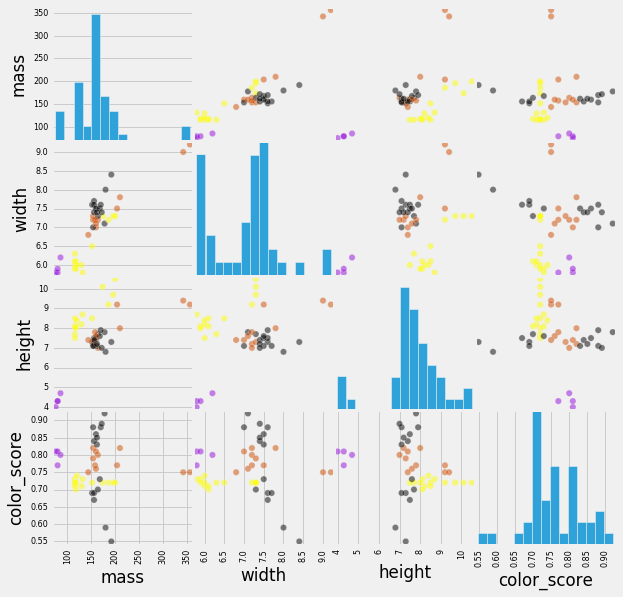

In [18]:
cmap = cm.get_cmap("gnuplot")
pd.scatter_matrix(Xtrain, c=ytrain, marker="o", s=40, hist_kwds={"bins":15}, figsize=(9, 9), cmap=cmap);

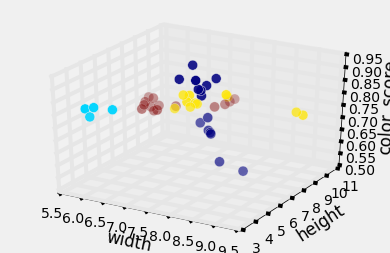

In [19]:
fig = plt.figure();
ax = fig.add_subplot(111, projection = '3d');
ax.scatter(Xtrain['width'], Xtrain['height'], Xtrain['color_score'], c = ytrain, marker = 'o', s=100);
ax.set_xlabel('width');
ax.set_ylabel('height');
ax.set_zlabel('color_score');
plt.show();

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(Xtrain, ytrain);
knn.score(Xtest, ytest)

0.53333333333333333

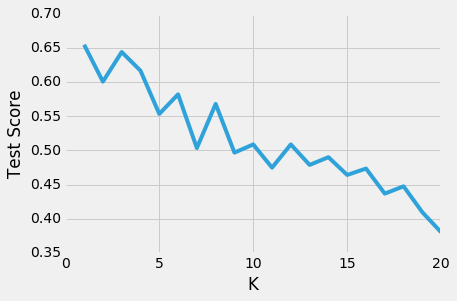

In [30]:
krange = np.arange(1, 21, 1)
scores = []
for k in krange:
    run_scores = []
    for t in range(100):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Xtrain, ytrain)
        run_scores.append(knn.score(Xtest, ytest))
    scores.append(np.mean(run_scores))
plt.plot(krange, scores);
plt.xlabel("K");
plt.ylabel("Test Score");

In [27]:
fruit_prediction = knn.predict([20, 4.3, 5.5, 0.6]);
print lookup_Fruit_name[fruit_prediction[0]]

lemon


C:\Users\Steve\Anaconda2\envs\gl-env\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
